# Object classification
[apoc](https://github.com/haesleinhuepf/apoc) allows classifying labeled object according to properties such as size, shape and intensity in a corresponding image.

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import pandas as pd
import numpy as np
import apoc

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
image = cle.push(imread('blobs.tif'))
labels = cle.push(imread('labels.tif'))
annotation = cle.push(imread('label_annotation.tif'))

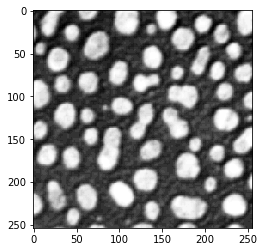

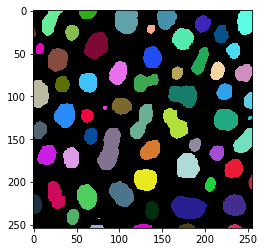

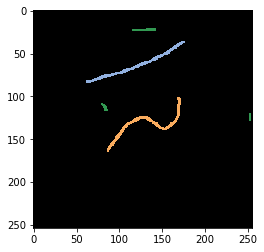

In [3]:
cle.imshow(image)
cle.imshow(labels, labels=True)
cle.imshow(annotation, labels=True)

## Training

In [4]:
features = 'area,mean_max_distance_to_centroid_ratio,standard_deviation_intensity'

cl_filename = "object_classifier.cl"

# Create an object classifier
apoc.erase_classifier(cl_filename) # delete it if it was existing before
classifier = apoc.ObjectClassifier(cl_filename)

# train it
classifier.train(features, labels, annotation, image)

## Prediction

3.0


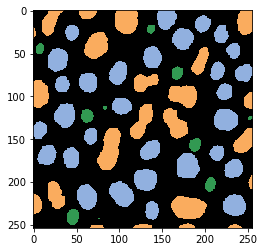

In [5]:
# determine object classification
result = classifier.predict(labels, image)

print(result.max())

cle.imshow(result, labels=True)

3.0


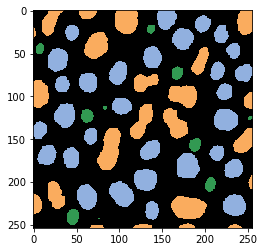

In [6]:
# now, we reload the classifier from disc:
classifier = apoc.ObjectClassifier(cl_filename)


result = classifier.predict(labels, image)

print(result.max())

cle.imshow(result, labels=True)

After training, we can ask the classifier how important features were while doing the prediction.

In [13]:
classifier.feature_importances()

{'area': 0.3025322479529508,
 'mean_max_distance_to_centroid_ratio': 0.41390858420969434,
 'standard_deviation_intensity': 0.28355916783735474}